The following code in written on a jupyter notebook due to error with paths in python scripts (.py)

In [1]:
# MODULES
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [4]:
# PARAMETERS MODIFIED DURING EXPERIMENT
pixels = 100
pool_size_1 = (3,3)
pool_size_2 = (3,3)
pool_size_3 = (3,3)
n_neurons = 400
epoch = 50
batch = 128

In [2]:
# TEST DATA
dataset = pd.read_csv('../data.csv' , sep= ';')

In [5]:
# IMAGE EXTRACTION AND RESHAPE AND RESIZE TO 100 x 100 PIXELS
image_list = []
for image in dataset['image']:
    path = '../cetaceous_images/' + image
    img = cv2.imread(path)
    image = cv2.resize(img, (pixels, pixels))
    image_list.append(image)
    

In [4]:
# TRAIN / VAL / TEST SPLIT
X = ((np.array(image_list)) / 255)
y = to_categorical(dataset['categories'])

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2)

X_val = X_train[-600:]
y_val = y_train[-600:]
X_train = X_train[:-600]
y_train = y_train[:-600]

In [5]:
# MODEL PREPARATION
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', 
            input_shape=(pixels, pixels, 3)))
model.add(MaxPooling2D(pool_size=pool_size_1))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size_2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size_3))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(n_neurons, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax')) 

model.compile(optimizer="adam",
            loss='categorical_crossentropy',
            metrics=['accuracy'])

summary = model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [7]:
# MODEL TRAINING
history = model.fit(X_train,
        y_train,
        epochs=epoch,
        batch_size=batch, 
        validation_data = (X_val,y_val))

Epoch 1/50
24/24 [==============================] - 9s 367ms/step - loss: 1.0188 - accuracy: 0.4653 - val_loss: 0.9275 - val_accuracy: 0.5483
Epoch 2/50
24/24 [==============================] - 8s 349ms/step - loss: 0.7746 - accuracy: 0.6083 - val_loss: 0.7749 - val_accuracy: 0.6717
Epoch 3/50
24/24 [==============================] - 10s 421ms/step - loss: 0.7079 - accuracy: 0.6490 - val_loss: 0.7034 - val_accuracy: 0.7017
Epoch 4/50
24/24 [==============================] - 20s 827ms/step - loss: 0.6446 - accuracy: 0.6927 - val_loss: 0.6724 - val_accuracy: 0.7150
Epoch 5/50
24/24 [==============================] - 21s 865ms/step - loss: 0.6065 - accuracy: 0.7233 - val_loss: 0.6307 - val_accuracy: 0.7533
Epoch 6/50
24/24 [==============================] - 21s 861ms/step - loss: 0.5544 - accuracy: 0.7453 - val_loss: 0.5801 - val_accuracy: 0.7733
Epoch 7/50
24/24 [==============================] - 10s 410ms/step - loss: 0.5249 - accuracy: 0.7697 - val_loss: 0.6005 - val_accuracy: 0.7433
E

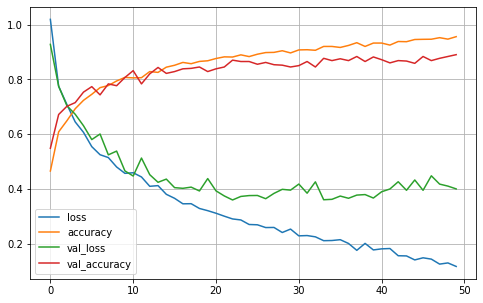

In [8]:
history_df = pd.DataFrame(history.history)
fig = history_df.plot(figsize=(8,5))
plt.grid(True)
plt.savefig('../../cetaceous_group_predictor/training_stats.png')

In [9]:
#RESULTS
results = model.evaluate(X_test, y_test)
print("test loss, test accuracy",results)

29/29 [==============================] - 1s 32ms/step - loss: 0.3185 - accuracy: 0.8900
test loss, test accuracy [0.31853973865509033, 0.8899999856948853]


In [10]:
# MODEL SAVE
model.save("../../cetaceous_group_predictor/model.h5")
history_df.to_csv('../../cetaceous_group_predictor/history_df.csv' , sep= ';' , index= False)

print('Elements correctly saved')
print('\nEND OF THE TRAINING')

Elements correctly saved

END OF THE TRAINING
